Data Preprocessing

In [163]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# Load the dataset
file_path = 'Data_Cortex_Nuclear.csv'
data = pd.read_csv(file_path)

In [165]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1

In [166]:
# Display dataset information
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float

In [167]:
# Remove unwanted columns
data.drop(columns=['MouseID'], inplace=True)

In [168]:
# Handling Missing Values
# Impute missing values with the mean for columns with fewer missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].isnull().sum() <= 10:  # Arbitrary threshold for small number of missing values
            data[column].fillna(data[column].mean(), inplace=True)

In [169]:
# Columns with significant missing values
columns_with_missing_values = ['ELK_N', 'Bcatenin_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']


In [170]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

In [171]:
# Impute missing values using KNN imputer
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])


In [172]:
# Check if all missing values are handled
remaining_missing_values_after_knn = data.isnull().sum()
print("\nRemaining missing values after KNN imputation:")
print(remaining_missing_values_after_knn[remaining_missing_values_after_knn > 0])



Remaining missing values after KNN imputation:
Series([], dtype: int64)


In [173]:
# Normalization/Scaling
# Initialize the scaler
scaler = MinMaxScaler()

In [174]:
# Scale the protein expression levels (excluding categorical columns)
protein_columns = data.columns[:-4]  # Exclude 'Genotype', 'Treatment', 'Behavior', 'class'
data[protein_columns] = scaler.fit_transform(data[protein_columns])


In [175]:
# Encoding Categorical Variables
# Initialize the label encoder
label_encoder = LabelEncoder()


In [176]:
# Encode 'Genotype', 'Treatment', 'Behavior', and 'class'
categorical_columns = ['Genotype', 'Treatment', 'Behavior', 'class']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [177]:
# Save the preprocessed dataset to a new CSV file
preprocessed_file_path = 'Preprocessed_mouse.csv'
data.to_csv(preprocessed_file_path, index=False)

In [178]:
print("Preprocessing completed. Preprocessed dataset saved as 'Preprocessed_mouse.csv'.")


Preprocessing completed. Preprocessed dataset saved as 'Preprocessed_mouse.csv'.


In [179]:
# Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.118296     0.157699     0.533818     0.398234     0.312289   
std       0.105024     0.106601     0.129103     0.142908     0.138147   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.060242     0.096852     0.451515     0.300115     0.210933   
50%       0.093298     0.136175     0.527572     0.398234     0.300335   
75%       0.144345     0.191805     0.609609     0.493324     0.398452   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000  ...   
mean      0.357140     0.465586     0.358347     0.515739     0.175861  ...   
std       0.087380     0.106727     0.211332     0.168230     0.082025  ...

EDA 

In [180]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [181]:
# Load the preprocessed dataset
data = pd.read_csv('Preprocessed_mouse.csv')

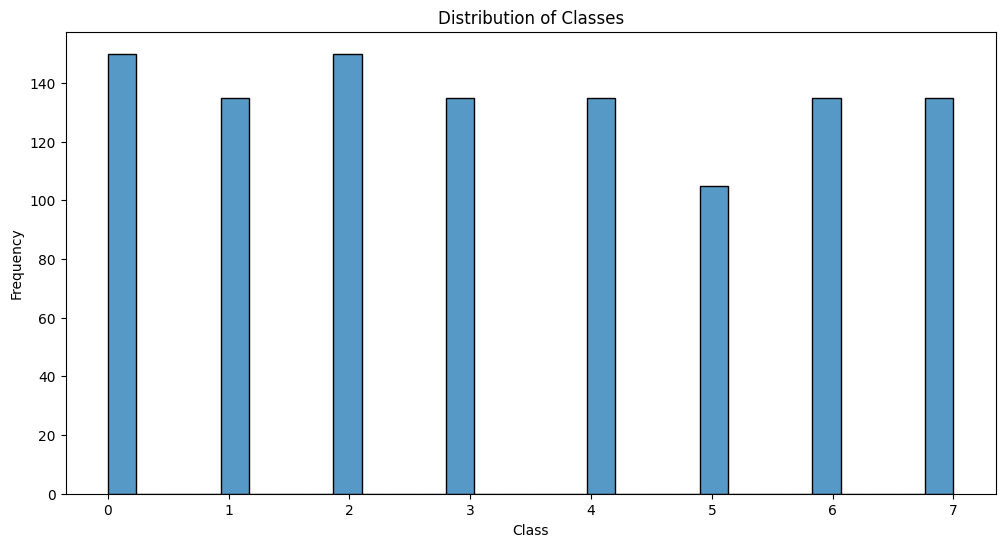

In [182]:
# Visualizations
# Distribution of classes
plt.figure(figsize=(12, 6))
sns.histplot(data['class'], kde=False, bins=30)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

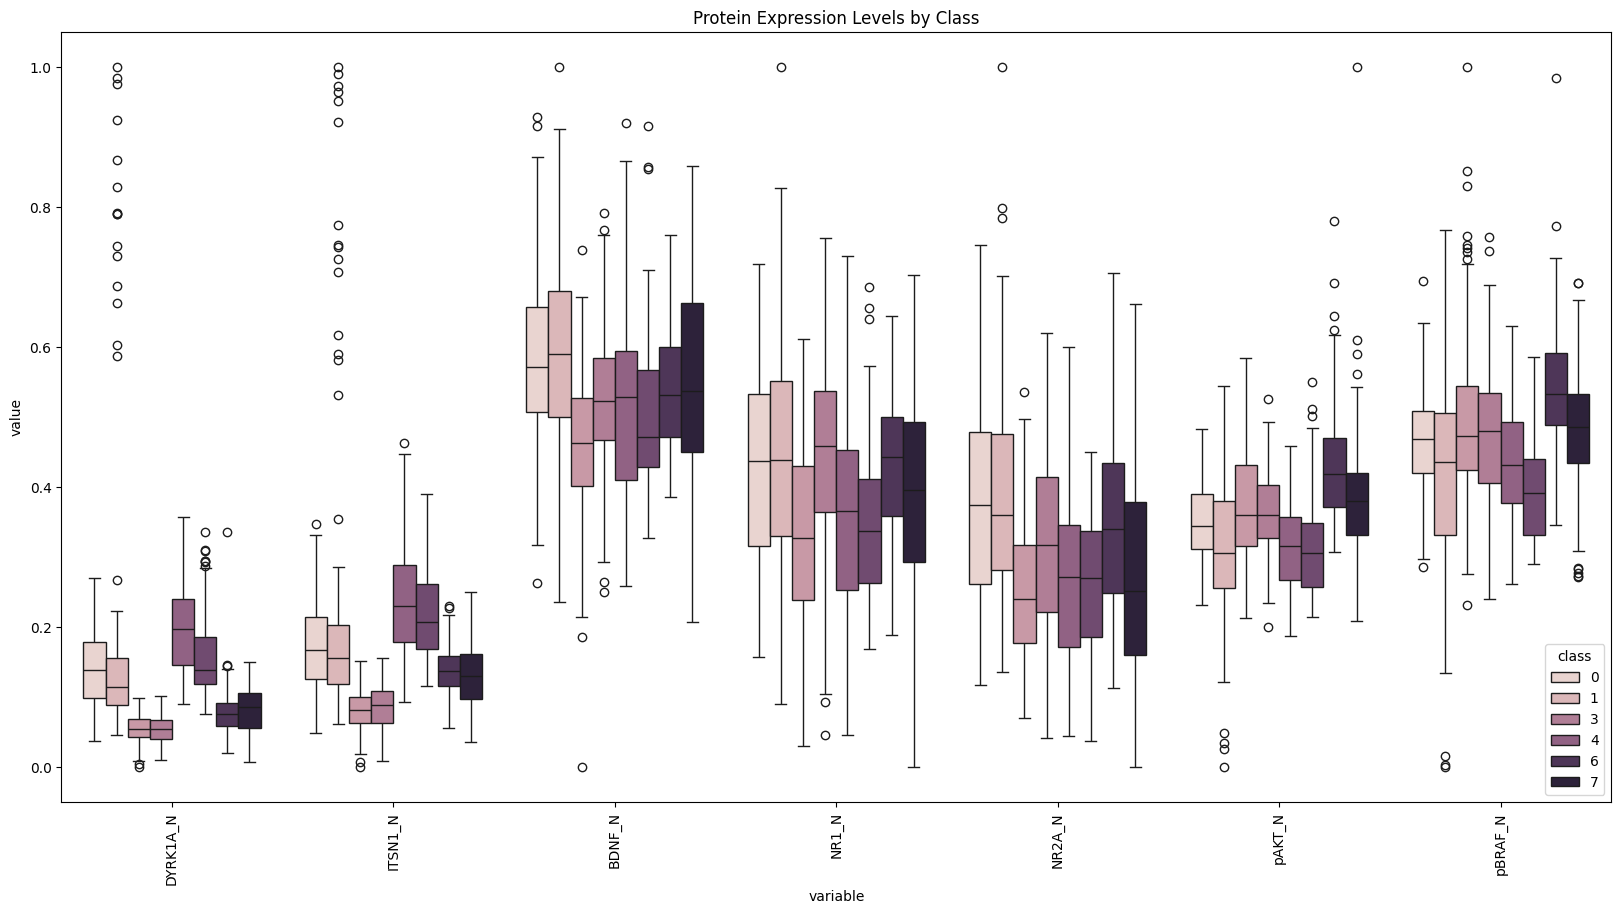

In [183]:
# Boxplot for protein expression levels by class
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.melt(id_vars='class', value_vars=protein_columns[:7]), x='variable', y='value', hue='class')
plt.title('Protein Expression Levels by Class')
plt.xticks(rotation=90)
plt.show()

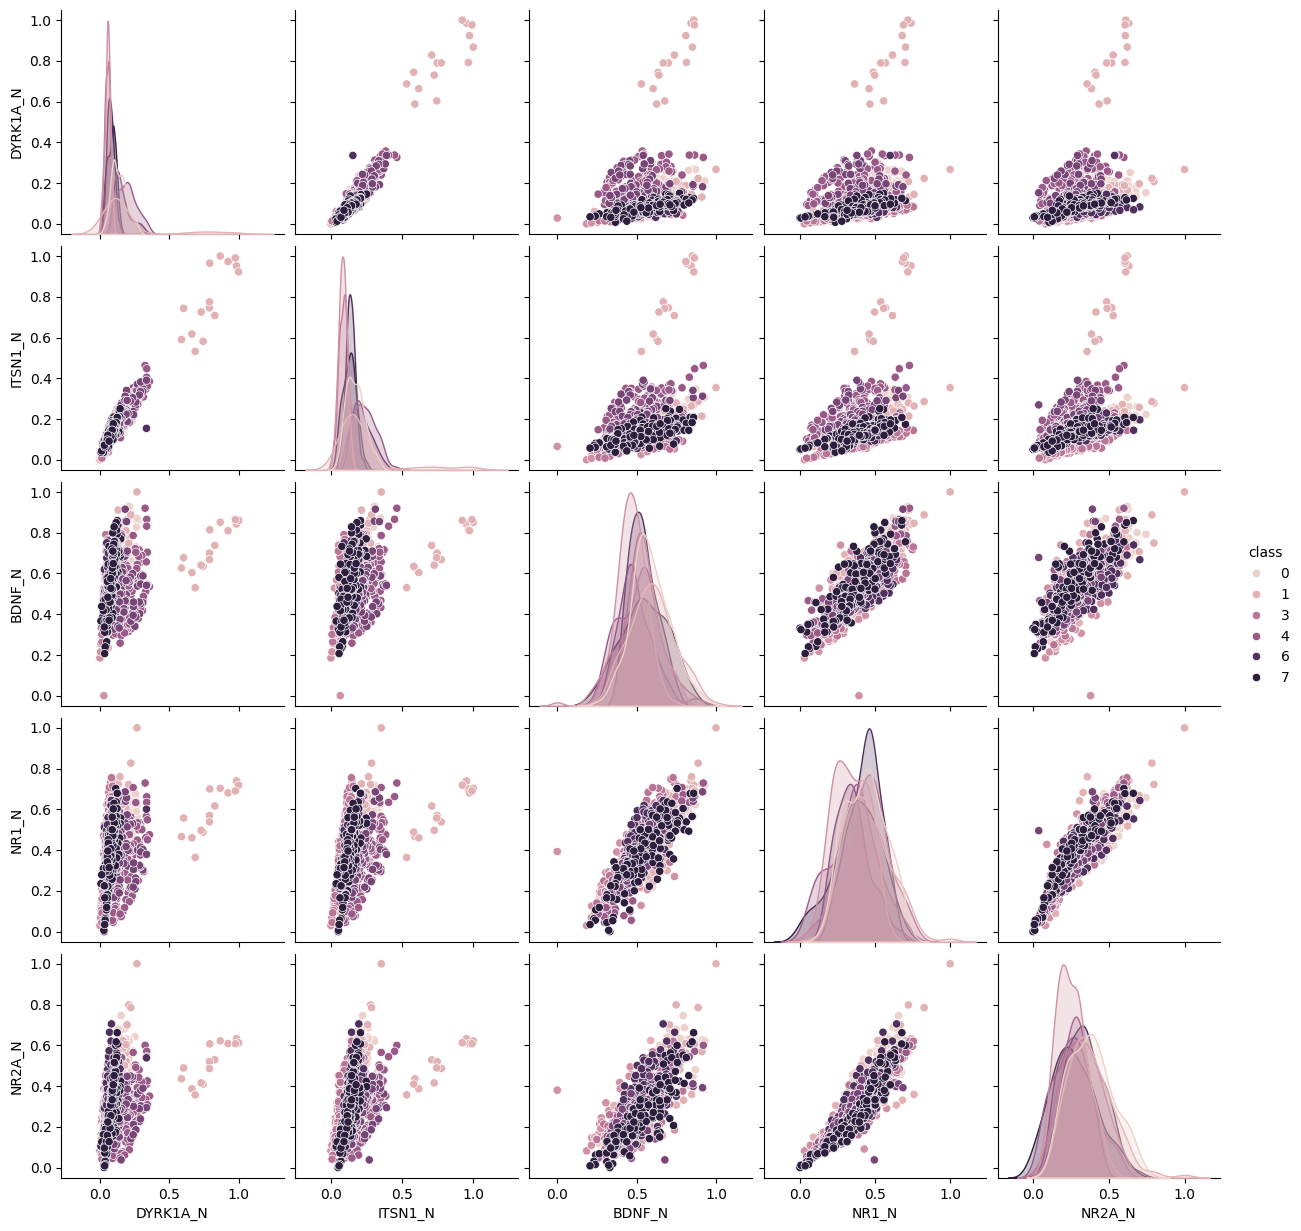

In [184]:
# Pairplot to see relationships between proteins and classes
sns.pairplot(data, hue='class', vars=protein_columns[:5])  # Limiting to first 5 proteins for simplicity
plt.show()

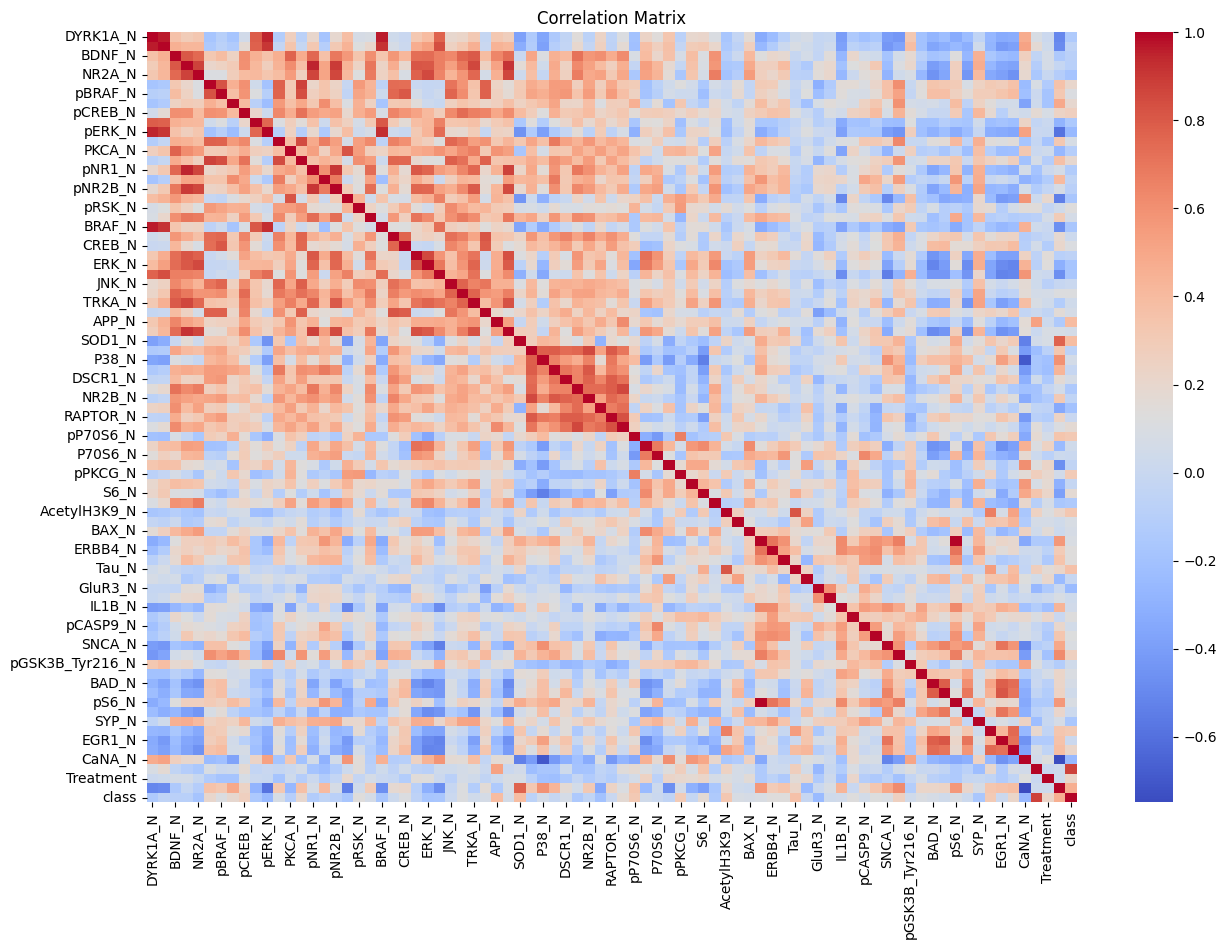

In [185]:
# Correlation Analysis
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Selection

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [187]:
data=pd.read_csv('Preprocessed_mouse.csv')
# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

In [188]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [189]:
# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

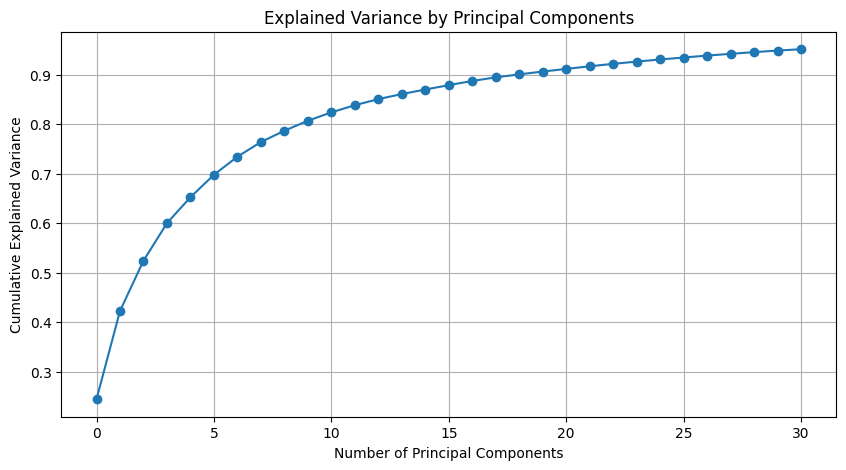

In [190]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [191]:
# Get the column names from the original data
column_names = X.columns.tolist()

# Select the first n columns, where n is the number of principal components retained
n_components = X_pca.shape[1]
column_names = column_names[:n_components]

# Create a DataFrame with the principal components
X_pca_df = pd.DataFrame(X_pca, columns=column_names)
X_pca_df['class'] = y

In [192]:
# Save the dataset with principal components
selected_data_file_path = 'selected_mouse.csv'
X_pca_df.to_csv(selected_data_file_path, index=False)

In [193]:
print("Feature selection with PCA completed. Dataset with principal components saved as 'Selected_mouse.csv'.")


Feature selection with PCA completed. Dataset with principal components saved as 'Selected_mouse.csv'.


In [194]:
df = pd.read_csv('selected_mouse.csv')
X = df.iloc[:,:-1]
y = df['class']

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

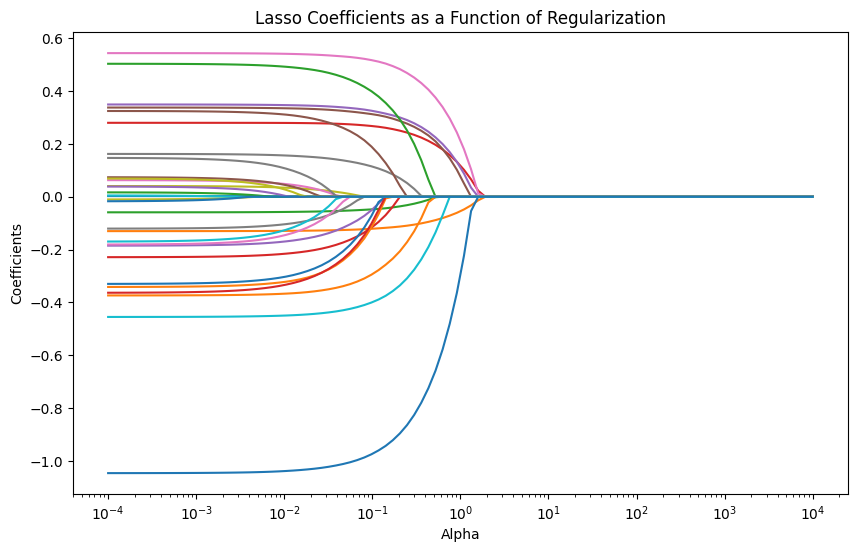

In [196]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 4, 100)
lasso = Lasso(max_iter=10000)
coefs = []

# Fit lasso regression models with different alpha values
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Plot coefficient values against alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Regularization')
plt.axis('tight')
plt.show()


Model Training

In [197]:
# Fit Lasso with a specific alpha value
alpha = 1.0  # Adjust this alpha value based on your analysis
lasso.set_params(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(max_iter=10000)

In [198]:
# Get coefficients and identify columns to drop
zero_coef_indices = np.where(lasso.coef_ == 0)[0]
zero_coef_columns = X_train.columns[zero_coef_indices]


In [199]:
# Drop columns with zero coefficients
X_train_reduced = X_train.drop(columns=zero_coef_columns)
X_test_reduced = X_test.drop(columns=zero_coef_columns)


In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [201]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [202]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [203]:
# Fit GridSearchCV on the reduced training data
grid_search.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [204]:
# Get the best estimator
best_rf_model = grid_search.best_estimator_
print("\nBest parameters for Random Forest:")
print(grid_search.best_params_)


Best parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [205]:
# Evaluate the model
y_pred_train = best_rf_model.predict(X_train_reduced)
y_pred_test = best_rf_model.predict(X_test_reduced)


In [206]:
# Training set performance
print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_train, average='weighted'):.4f}")


Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [207]:
# Testing set performance
print("\nTesting Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_test, average='weighted'):.4f}")



Testing Set Performance:
Accuracy: 0.9259
Precision: 0.9305
Recall: 0.9259
F1-Score: 0.9259


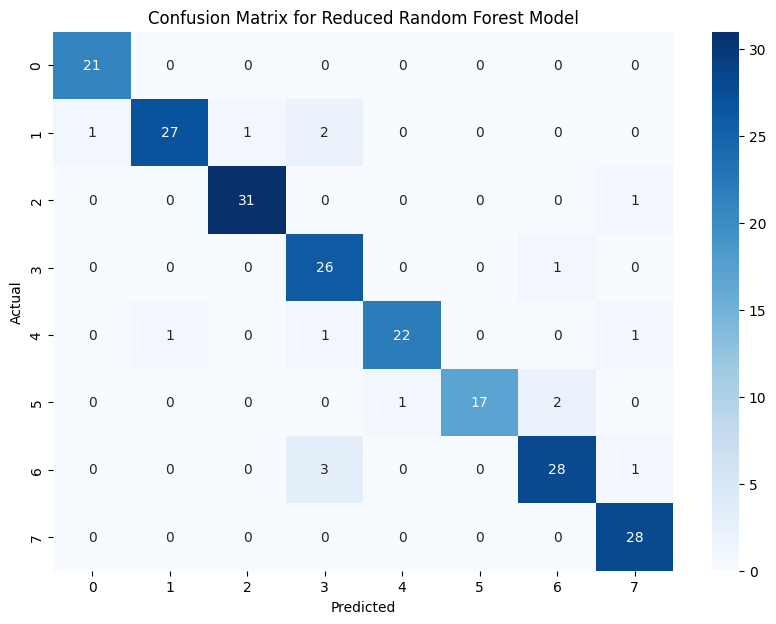

In [208]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Reduced Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [209]:
class_report = classification_report(y_test, y_pred_test)
print("\nClassification Report for Reduced Random Forest Model:")
print(class_report)



Classification Report for Reduced Random Forest Model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.96      0.87      0.92        31
           2       0.97      0.97      0.97        32
           3       0.81      0.96      0.88        27
           4       0.96      0.88      0.92        25
           5       1.00      0.85      0.92        20
           6       0.90      0.88      0.89        32
           7       0.90      1.00      0.95        28

    accuracy                           0.93       216
   macro avg       0.93      0.93      0.93       216
weighted avg       0.93      0.93      0.93       216



In [210]:
# Get feature importances from the trained model
feature_importances = pd.DataFrame(best_rf_model.feature_importances_,
                                   index = X_train_reduced.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 20 most important features
print("Top 5 Most Important Features:")
print(feature_importances.head())


Top 5 Most Important Features:
         importance
ITSN1_N    0.212199
pERK_N     0.187219
pAKT_N     0.172524
pBRAF_N    0.169072
NR1_N      0.136902


C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_17088\1655905003.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['importance'], y=top_features.index, palette="viridis", legend=False)


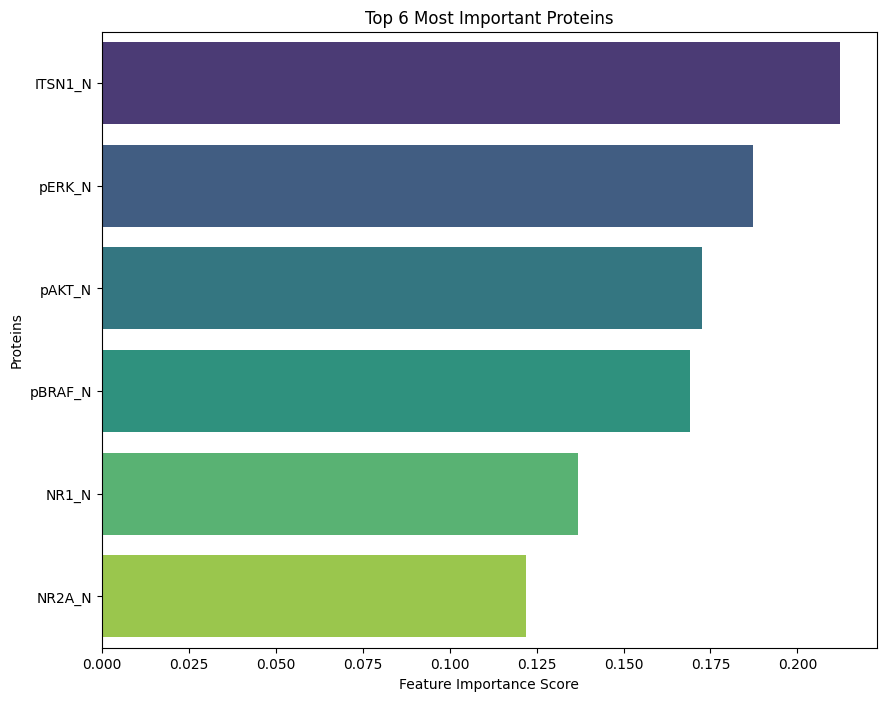

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_rf_model' is your trained Random Forest model
# and 'X_train_reduced' is your training data

# Get feature importances
feature_importances = pd.DataFrame(best_rf_model.feature_importances_,
                                   index = X_train_reduced.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Select the top 20 most important features
top_features = feature_importances.head(6)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['importance'], y=top_features.index, palette="viridis", legend=False)
plt.title('Top 6 Most Important Proteins')
plt.xlabel('Feature Importance Score')
plt.ylabel('Proteins')
plt.show()


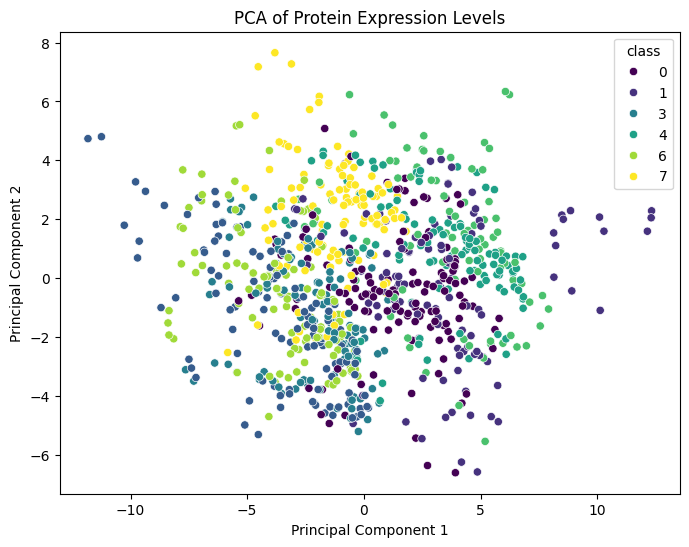

In [212]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_reduced)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y_train.reset_index(drop=True)], axis=1)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='viridis')
plt.title('PCA of Protein Expression Levels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


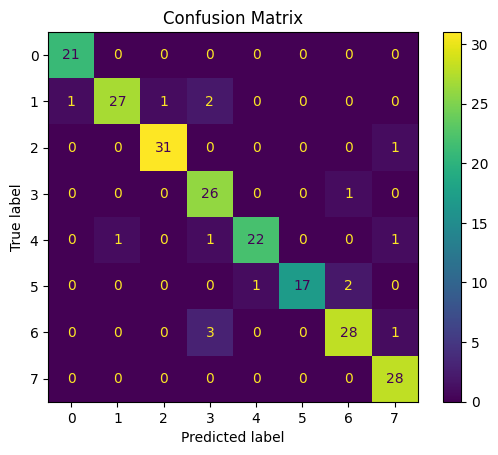

In [213]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = best_rf_model.predict(X_test_reduced)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)

# Plot confusion matrix
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


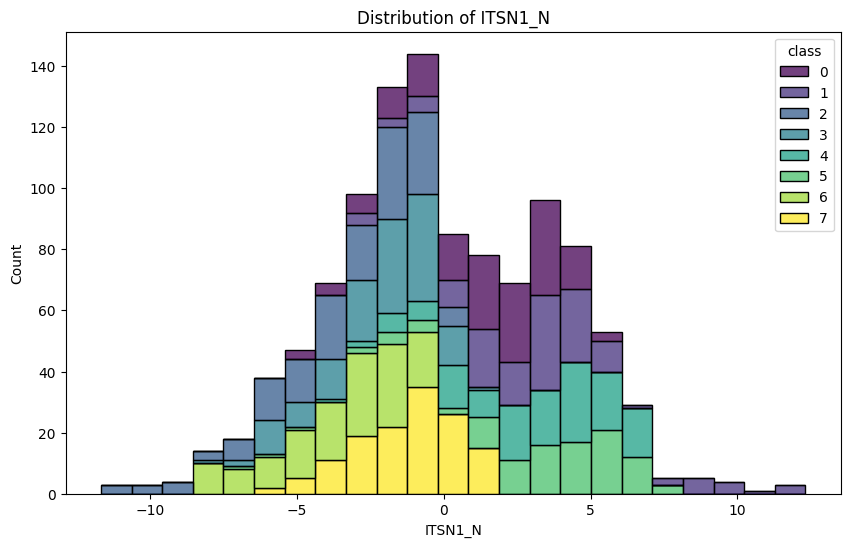

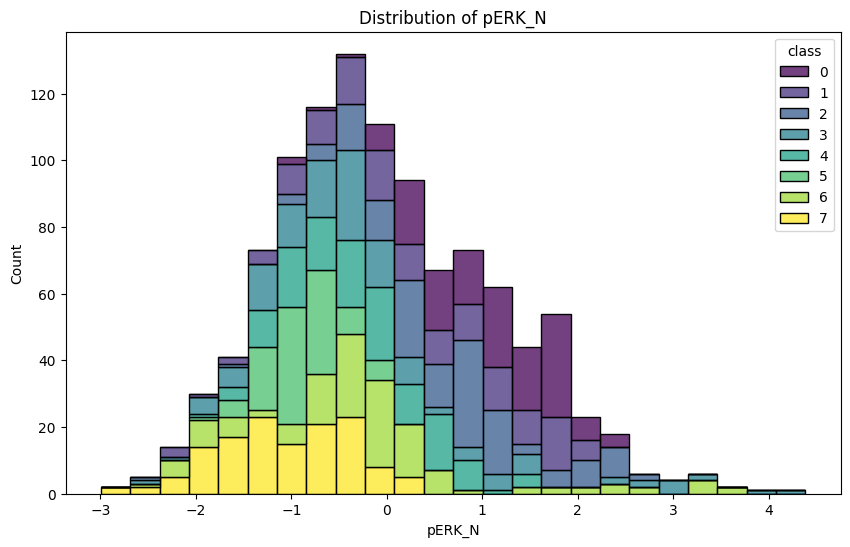

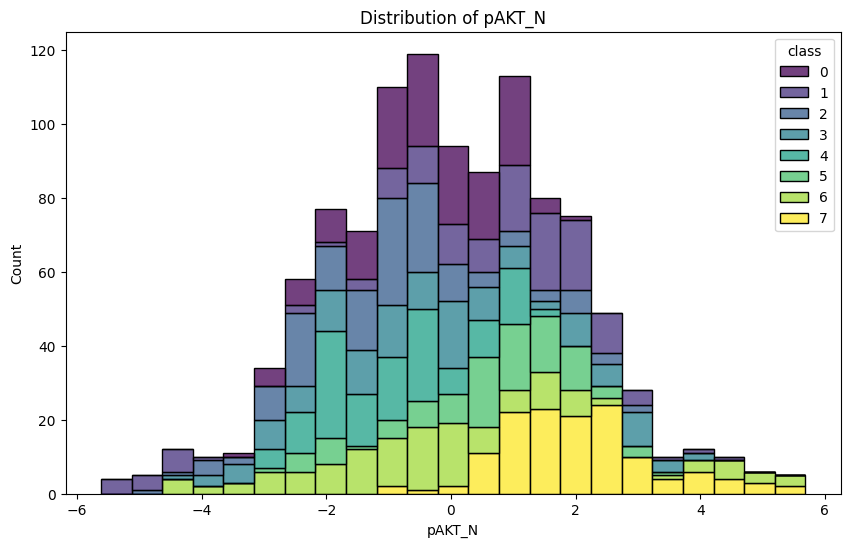

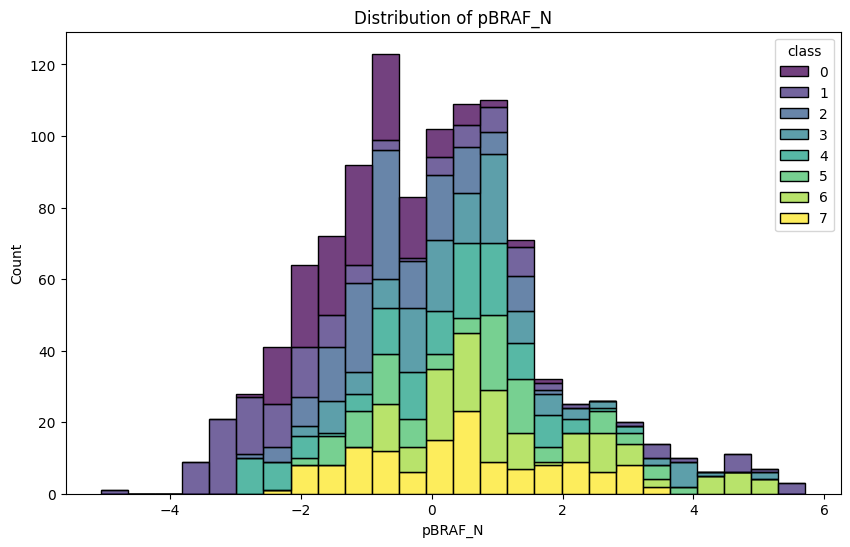

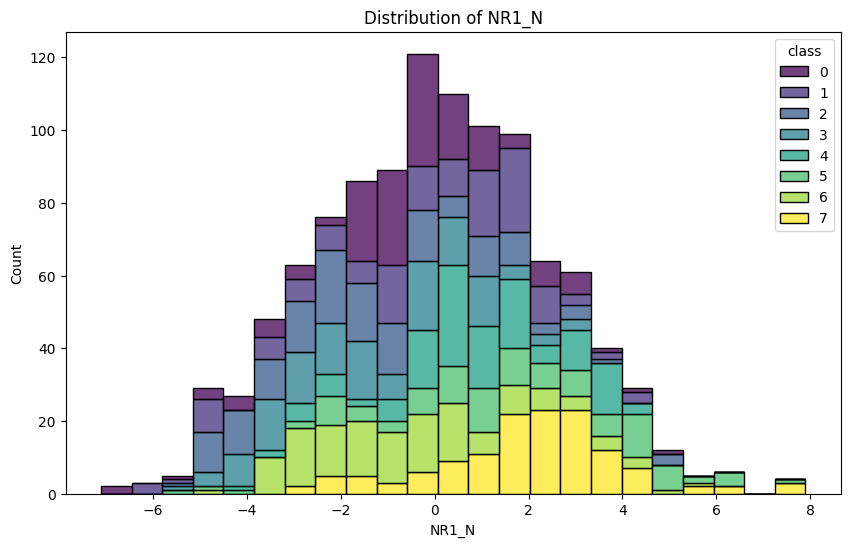

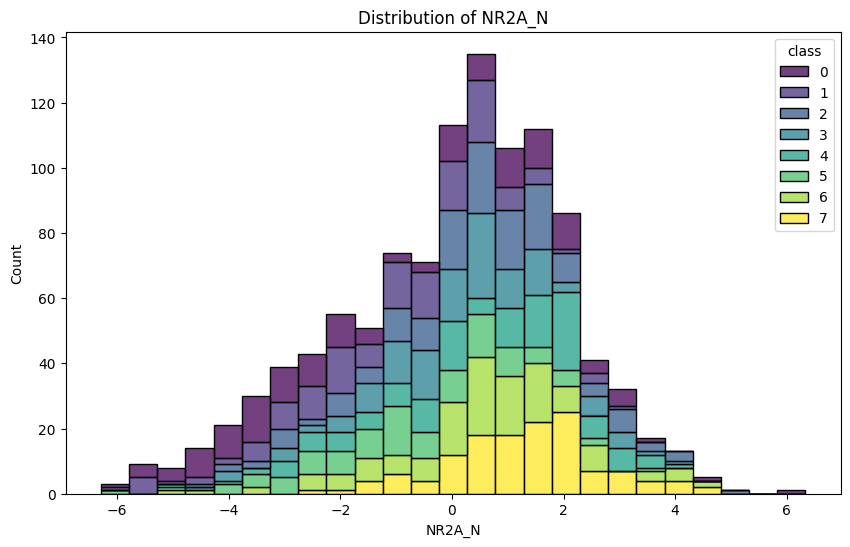

In [214]:
for feature in top_features.index:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='class', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.show()


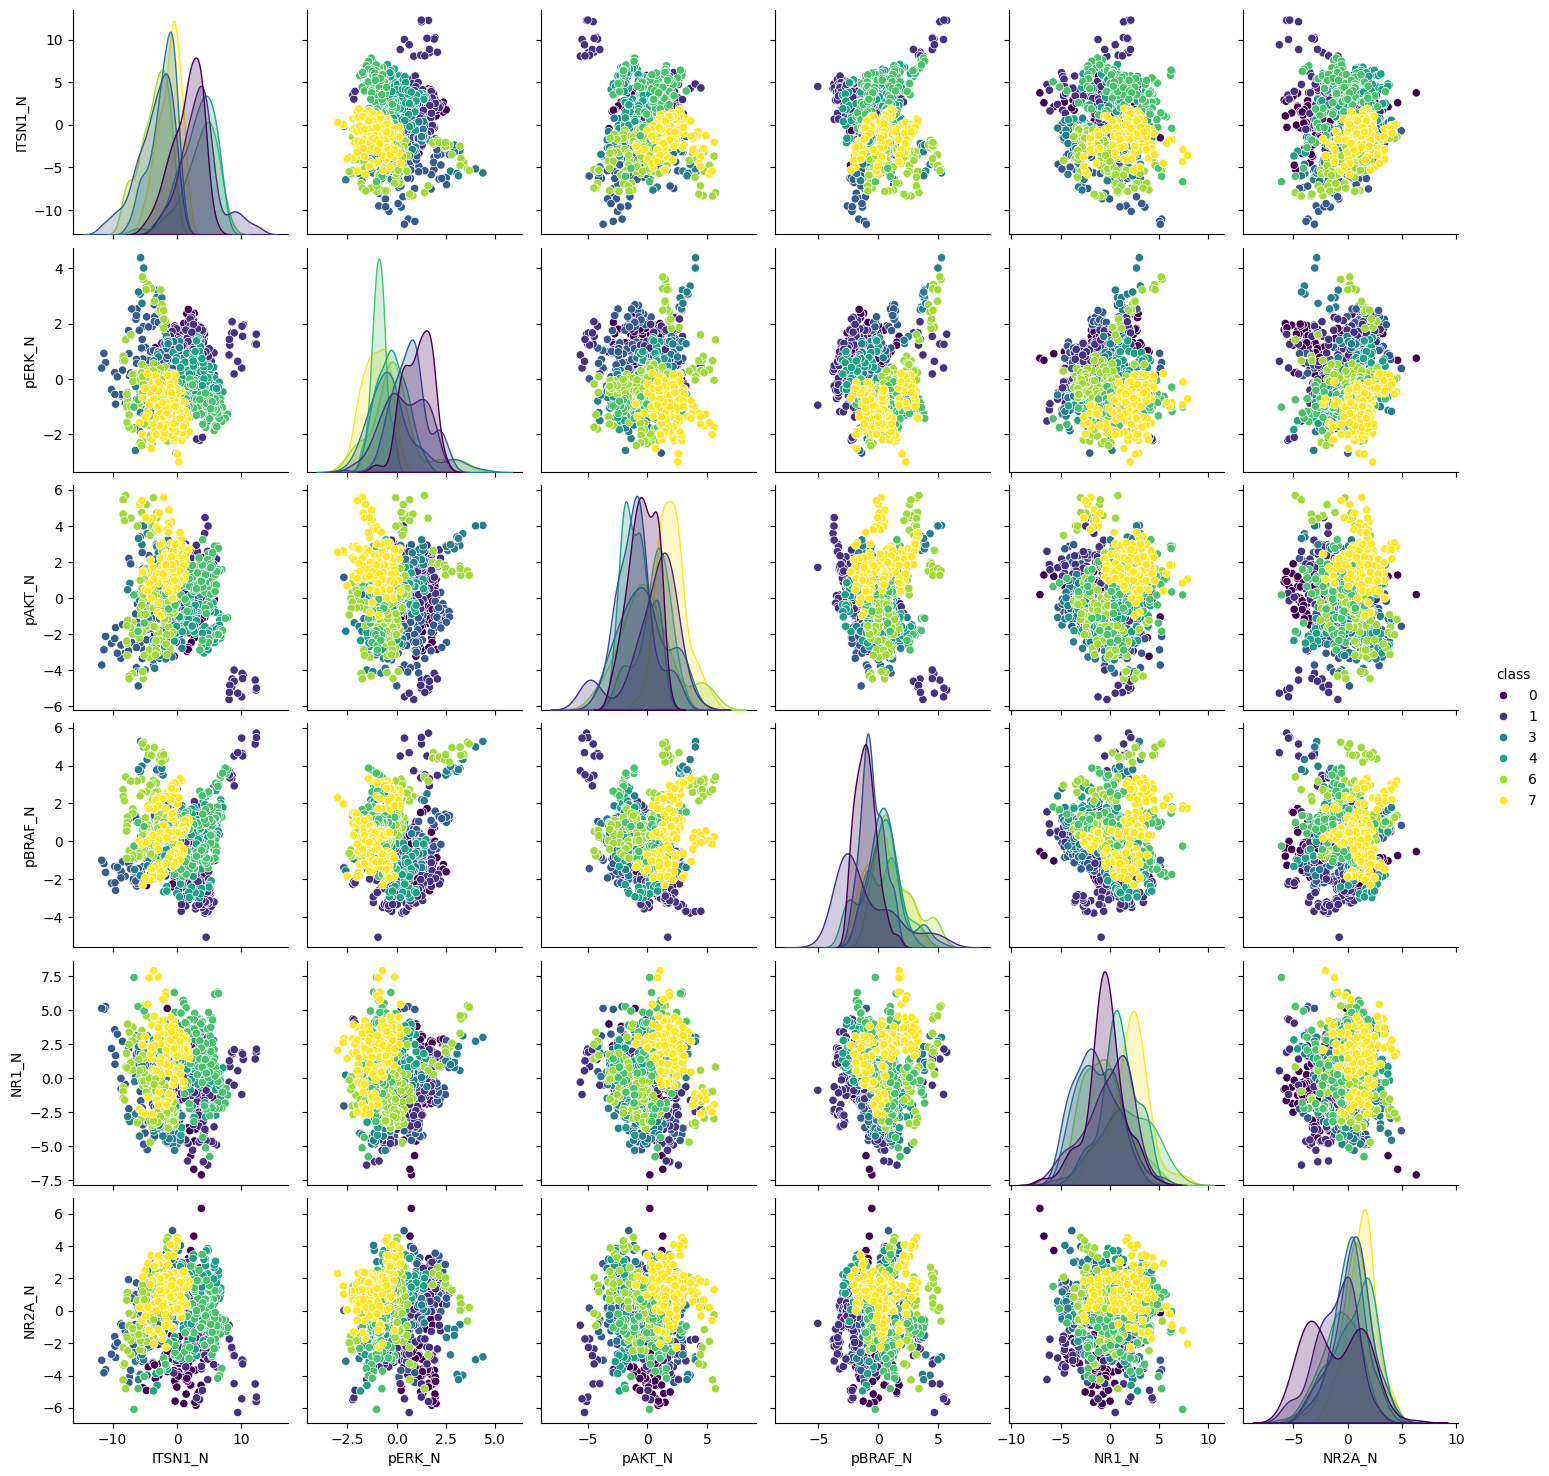

In [215]:
import seaborn as sns

# Select top important features
top_features_names = top_features.index.tolist()
sns.pairplot(df[top_features_names + ['class']], hue='class', palette="viridis")
plt.show()


In [222]:
# Example code to analyze the impact of genotype, behavior, and treatment
def analyze_impact(data, group_col, target_col):
    grouped = data.groupby(group_col)[target_col].mean()
    return grouped

column_p=data.columns[:-4]

# Assuming the dataset contains columns for genotype, behavior, treatment, and protein expression levels
genotype_impact = analyze_impact(data, 'Genotype',column_p)
behavior_impact = analyze_impact(data, 'Behavior', column_p )
treatment_impact = analyze_impact(data, 'Treatment', column_p)

print("Impact of Genotype on Protein Expression:")
print(genotype_impact)

print("\nImpact of Behavior on Protein Expression:")
print(behavior_impact)

print("\nImpact of Treatment on Protein Expression:")
print(treatment_impact)


Impact of Genotype on Protein Expression:
          DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
Genotype                                                               
0         0.109416  0.140232  0.539167  0.413227  0.333157  0.349595   
1         0.128220  0.177221  0.527840  0.381477  0.288966  0.365572   

           pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
Genotype                                           ...                       
0         0.464274   0.353130  0.488395  0.178407  ...  0.351122  0.377220   
1         0.467052   0.364178  0.546299  0.173015  ...  0.348332  0.376147   

            BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  \
Genotype                                                                
0         0.316080  0.613274  0.276325  0.402724   0.205811  0.336537   
1         0.302766  0.570593  0.255252  0.342265   0.261856  0.296865   

          H3MeK4_N    CaNA_N  
Genotype                      
0

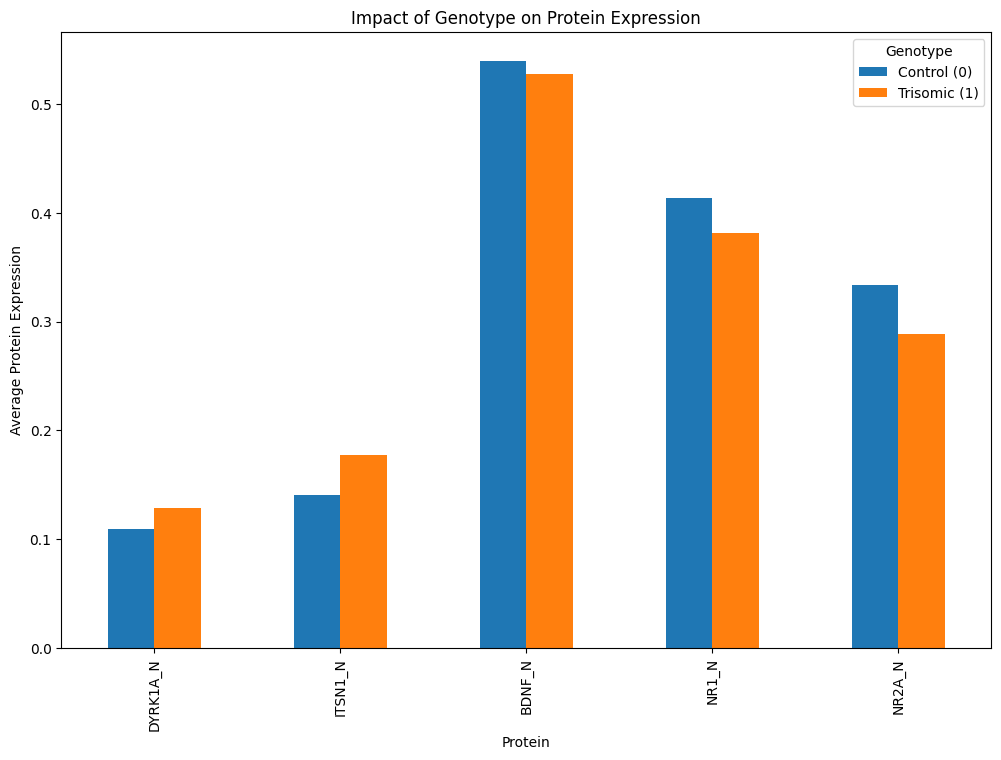

In [224]:
import matplotlib.pyplot as plt

# Sample of proteins to plot
proteins_sample = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N']

# Bar plot for genotype
genotype_mean = data.groupby('Genotype').mean()[proteins_sample]
genotype_mean.T.plot(kind='bar', figsize=(12, 8))
plt.title('Impact of Genotype on Protein Expression')
plt.ylabel('Average Protein Expression')
plt.xlabel('Protein')
plt.legend(title='Genotype', labels=['Control (0)', 'Trisomic (1)'])
plt.show()


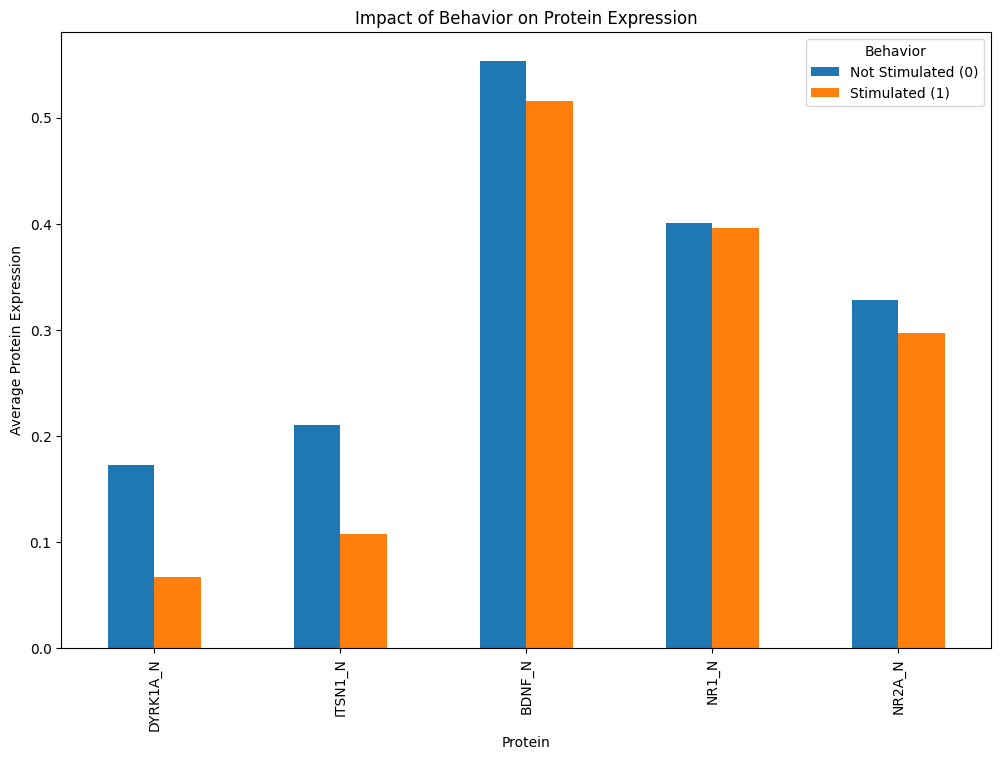

In [226]:
# Bar plot for behavior
behavior_mean = data.groupby('Behavior').mean()[proteins_sample]
behavior_mean.T.plot(kind='bar', figsize=(12, 8))
plt.title('Impact of Behavior on Protein Expression')
plt.ylabel('Average Protein Expression')
plt.xlabel('Protein')
plt.legend(title='Behavior', labels=['Not Stimulated (0)', 'Stimulated (1)'])
plt.show()


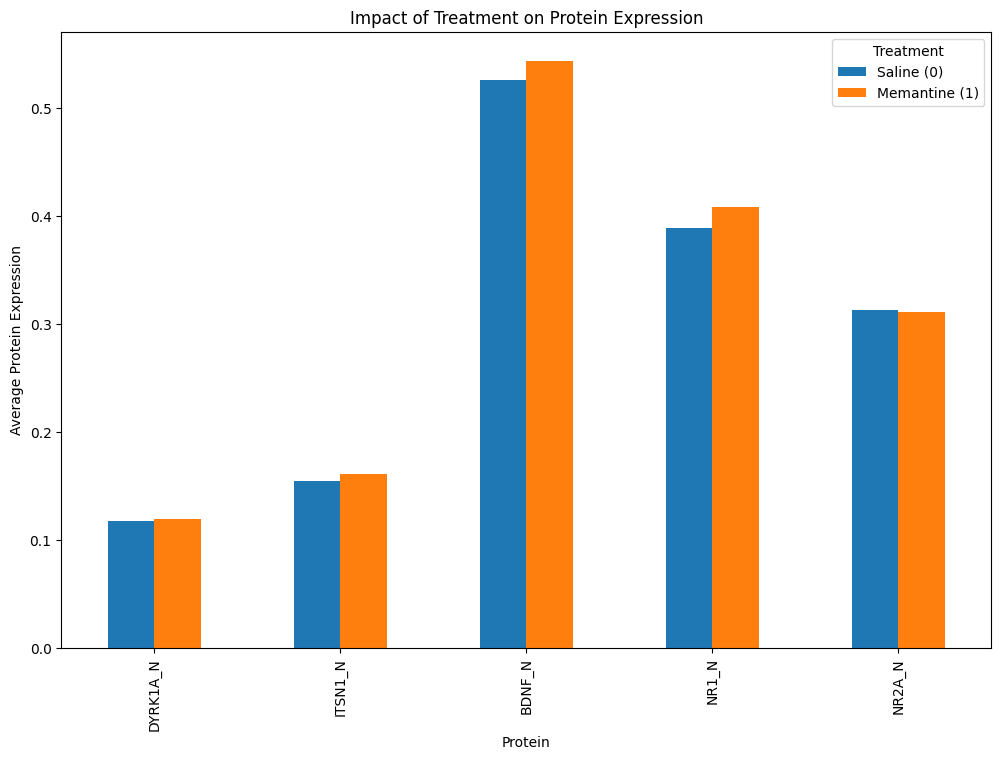

In [228]:
# Bar plot for treatment
treatment_mean = data.groupby('Treatment').mean()[proteins_sample]
treatment_mean.T.plot(kind='bar', figsize=(12, 8))
plt.title('Impact of Treatment on Protein Expression')
plt.ylabel('Average Protein Expression')
plt.xlabel('Protein')
plt.legend(title='Treatment', labels=['Saline (0)', 'Memantine (1)'])
plt.show()


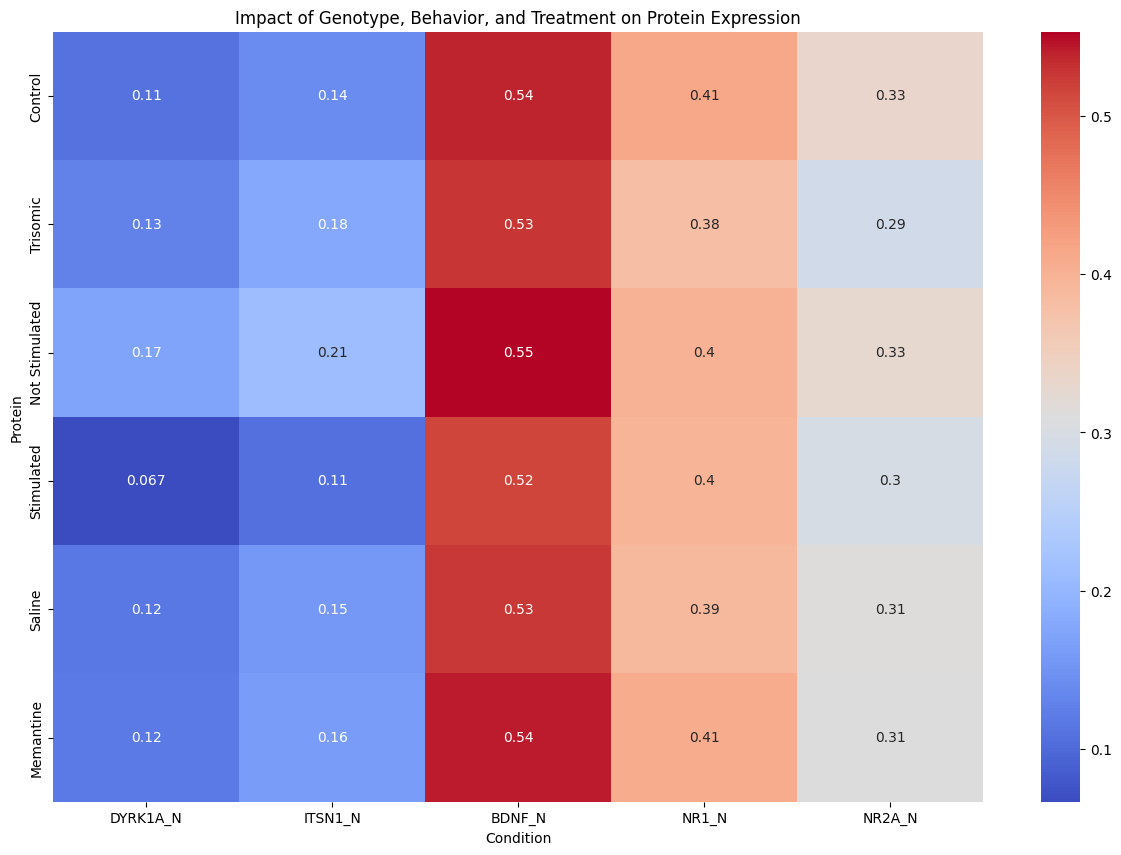

In [229]:
import seaborn as sns

# Create a combined DataFrame for heatmap
combined_mean = pd.concat([genotype_mean, behavior_mean, treatment_mean], axis=0)
combined_mean.index = ['Control', 'Trisomic', 'Not Stimulated', 'Stimulated', 'Saline', 'Memantine']

plt.figure(figsize=(15, 10))
sns.heatmap(combined_mean, annot=True, cmap='coolwarm')
plt.title('Impact of Genotype, Behavior, and Treatment on Protein Expression')
plt.ylabel('Protein')
plt.xlabel('Condition')
plt.show()
